In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Seed for reproducibility
np.random.seed(42)

# Random stations
stations = {
    'Station A': Point(np.random.randint(1, 5, size=1), -1*np.random.randint(7, 9, size=1)),
    'Station B': Point(np.random.randint(1, 5, size=1), np.random.randint(9, 11, size=1)),
    'Station C': Point(np.random.randint(1, 5, size=1), -1*np.random.randint(11, 13, size=1)),
    'Station D': Point(np.random.randint(1, 5, size=1), np.random.randint(13, 15, size=1)),
    'Station E': Point(np.random.randint(1, 5, size=1), -1*np.random.randint(15, 17, size=1)),
    'Station F': Point(np.random.randint(1, 5, size=1), np.random.randint(17, 19, size=1))}
stations

{'Station A': <POINT (3 -8)>,
 'Station B': <POINT (1 9)>,
 'Station C': <POINT (3 -12)>,
 'Station D': <POINT (1 13)>,
 'Station E': <POINT (3 -16)>,
 'Station F': <POINT (3 17)>}

In [3]:
stations_df = pd.DataFrame({
    'Station': stations.keys(),
    'Coordinates': stations.values()
})

stations_df['Index'] = range(1, len(stations_df) + 1)
stations_df.set_index('Index')

,Station,Coordinates
Index,,
1,Station A,POINT (3 -8)
2,Station B,POINT (1 9)
3,Station C,POINT (3 -12)
4,Station D,POINT (1 13)
5,Station E,POINT (3 -16)
6,Station F,POINT (3 17)


In [9]:
# Add separate columns for x and y coordinates
stations_df['X'] = stations_df['Coordinates'].apply(lambda point: point.x)
stations_df['Y'] = stations_df['Coordinates'].apply(lambda point: point.y)

# Display the DataFrame with X and Y coordinates
print(stations_df[['Index','Station', 'X', 'Y']])

   Index    Station    X     Y
0      1  Station A  3.0  -8.0
1      2  Station B  1.0   9.0
2      3  Station C  3.0 -12.0
3      4  Station D  1.0  13.0
4      5  Station E  3.0 -16.0
5      6  Station F  3.0  17.0


In [10]:
# Convert to a dictionary for easy lookup
station_coords = stations_df.set_index('Station')[['X', 'Y']].to_dict(orient='Index')

In [11]:
# List to show bird movement
data=[]

number_of_birds=5

for bird in range(1, number_of_birds+1):
    #Random;y select 6 stations for each bird
    visited_stations = np.random.choice(list(stations.keys()), size=6, replace=False)
    for i in range(number_of_birds+1):
        station = visited_stations[i]
        # Get x and y coordinates from station_coords
        x, y = station_coords[station]['X'], station_coords[station]['Y']

        #generate random timestamp within a day
        timestamp = pd.Timestamp('2024-10-30')+ pd.Timedelta(minutes=np.random.randint(0,1440))
        data.append({
            'Bird_ID': bird,
            'Station': station,
            'geometry': Point(x+np.random.normal(0,0.0005), y+np.random.normal(0,0.0005)), #Small random noise on coordinates added
            'Timestamp': timestamp
        })
# Create geodataframe
gdf = gpd.GeoDataFrame(data, crs='EPSG:4326').sort_values(['Bird_ID','Timestamp'])

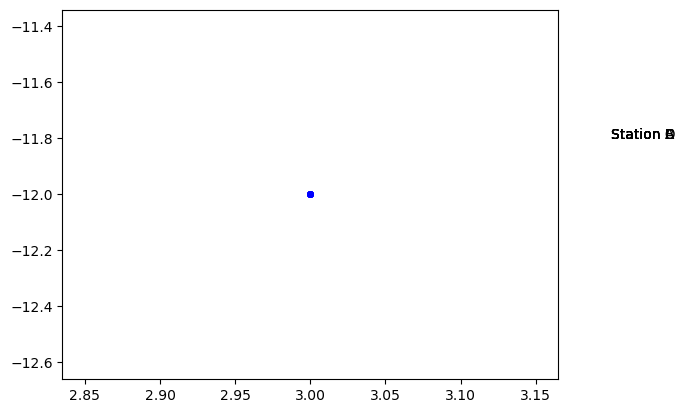

In [12]:
for station, station_coord in stations.items():
            plt.plot(x,y,'bo', markersize=4) # station marker
            plt.text(x+0.2, y+0.2, station, fontsize=10, ha='left')

In [13]:
# Function to plot bird movement on a graph
def plot_bird_movement(bird_id):
    # filter data for specific bird and sort by time
    bird_data=gdf[gdf['Bird_ID']==bird_id].sort_values(by='Timestamp')
    try:
        plt.figure(figsize=(10,8))
        #Plot the stations
        for station, (x,y) in stations.items():
            plt.plot(x,y,'bo', markersize=7) # station marker
            plt.text(x+0.2, y+0.2, station, fontsize=10, ha='left')
        #plot bird's path using arrows based on the timestamps
        for i in range(len(bird_data)-1):
            x1, y1 = bird_data.iloc[i]['geometry'].x, bird_data.iloc[i]['geometry'].y
            x2,y2 = bird_data.iloc[i+1]['geometry'].x, bird_data.iloc[i+1]['geometry'].y

            # draw an arrow if the timestamp of the next point is later than the current point
            if bird_data.iloc[i+1]['Timestamp'] > bird_data.iloc[i]['Timestamp']:
                plt.arrow(x1,y1, x2-x1, y2-y1,
                         head_width=0.2, head_length=0.4,
                         fc='k', ec='k', length_includes_head=True)
        plt.title(f"Movement of Bird {bird_id}")
        plt.xlabel("Longitudes")
        plt.ylabel("Latitudes")
        plt.xlim([bird_data['geometry'].x.min() - 2, bird_data['geometry'].x.max() + 2])
        plt.ylim([bird_data['geometry'].y.min() - 2, bird_data['geometry'].y.max() + 2])
        plt.grid(True)
        plt.show()
    except IndexError:
        print("Index out of range")
    except:
        if bird_data.empty:
            print(f"No data found for Bird {bird_id}")
plot_bird_movement(4)

<Figure size 1000x800 with 0 Axes>